In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [25]:
import pandas as pd
import numpy as np
import os
import re
import warnings
warnings.filterwarnings("ignore")
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from bs4 import BeautifulSoup
from nltk.corpus import stopwords

In [26]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [27]:
# read data from the csv file (from the location it is stored)
Data = pd.read_csv('/content/drive/MyDrive/CS521_Project/cleaned_wikihowAll.csv')
Data = Data.astype(str)
rows, columns = Data.shape

In [28]:
Data

,headline,title,text
0,"Keep related supplies in the same area., Make ...",How to Be an Organized Artist1,"If you're a photographer, keep all the necessa..."
1,Create a sketch in the NeoPopRealist manner of...,How to Create a Neopoprealist Art Work,See the image for how this drawing develops st...
2,"Get a bachelor’s degree., Enroll in a studio-b...",How to Be a Visual Effects Artist1,It is possible to become a VFX artist without ...
3,Start with some experience or interest in art....,How to Become an Art Investor,The best art investors do their research on th...
4,"Keep your reference materials, sketches, artic...",How to Be an Organized Artist2,"As you start planning for a project or work, y..."
...,...,...,...
215360,"Consider changing the spelling of your name., ...",How to Pick a Stage Name3,"If you have a name that you like, you might fi..."
215361,"Try out your name., Don’t legally change your ...",How to Pick a Stage Name4,Your name might sound great to you when you sa...
215362,"Understand the process of relief printing., Ex...",How to Identify Prints1,Relief printing is the oldest and most traditi...
215363,"Understand the process of intaglio printing., ...",How to Identify Prints2,"Intaglio is Italian for ""incis­ing,"" and corre..."


In [29]:
# Filtering rows where 'text' and 'headline' columns are not null
df = Data[(Data['text'].notna()) & (Data['headline'].notna())]

# Removing rows where the 'text' column has 'nan' as its value
df = df[df['text'] != 'nan']

# Dropping duplicate entries based on the 'text' column
df = df.drop_duplicates(subset='text', inplace=False)


In [30]:
# Set of stopwords
english_stopwords = set(stopwords.words('english'))

def clean_text_input(input_text, mode):
    modified_text = input_text.lower()
    modified_text = BeautifulSoup(modified_text, "lxml").get_text()
    modified_text = re.sub(r'\([^)]*\)', '', modified_text)
    modified_text = modified_text.replace('"', '')
    modified_text = ' '.join([contraction_mapping.get(word, word) for word in modified_text.split()])
    modified_text = re.sub(r"'s\b", "", modified_text)
    modified_text = re.sub("[^a-zA-Z]", " ", modified_text)
    modified_text = re.sub('[m]{2,}', 'mm', modified_text)

    if mode == 0:
        modified_text = re.sub(r'\.', ' . ', modified_text)
        words_list = [word for word in modified_text.split() if word not in english_stopwords]
    else:
        words_list = modified_text.split()

    # Filter out single-character words
    longer_words = [word for word in words_list if len(word) > 1]
    return " ".join(longer_words).strip()


In [31]:
# Flat contraction mapping
contraction_mapping = {
    "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
    "I'm": "I am", "I've": "I have",
    "you'd": "you would", "you'd've": "you would have", "you'll": "you will",
    "you'll've": "you will have", "you're": "you are", "you've": "you have",
    "he'd": "he would", "he'll": "he will", "he's": "he is",
    "she'd": "she would", "she'd've": "she would have", "she'll": "she will",
    "she'll've": "she will have", "she's": "she is",
    "it'd": "it would", "it'd've": "it would have", "it'll": "it will",
    "it'll've": "it will have", "it's": "it is",
    "we'd": "we would", "we'd've": "we would have", "we'll": "we will",
    "we'll've": "we will have", "we're": "we are", "we've": "we have",
    "they'd": "they would", "they'd've": "they would have", "they'll": "they will",
    "they'll've": "they will have", "they're": "they are", "they've": "they have",
    "aren't": "are not", "can't": "cannot", "couldn't": "could not", "didn't": "did not",
    "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not",
    "haven't": "have not", "isn't": "is not", "mustn't": "must not", "shan't": "shall not",
    "shouldn't": "should not", "wasn't": "was not", "weren't": "were not", "won't": "will not",
    "wouldn't": "would not", "'cause": "because", "o'clock": "of the clock", "ma'am": "madam", "let's": "let us"
}


In [9]:
cleaned_texts_list = []
for t in df['text']:
    cleaned_texts_list.append(clean_text_input(t, 0))

In [32]:
#call the function
clean_summary = []
for t in df['headline']:
    clean_summary.append(clean_text_input(t,0))

In [33]:
df['text']=cleaned_texts_list
df['headline']=clean_summary

df.replace('', np.nan, inplace=True)
df.dropna(axis=0,inplace=True)

Updating the df

**Analyzing the sequence distribution**

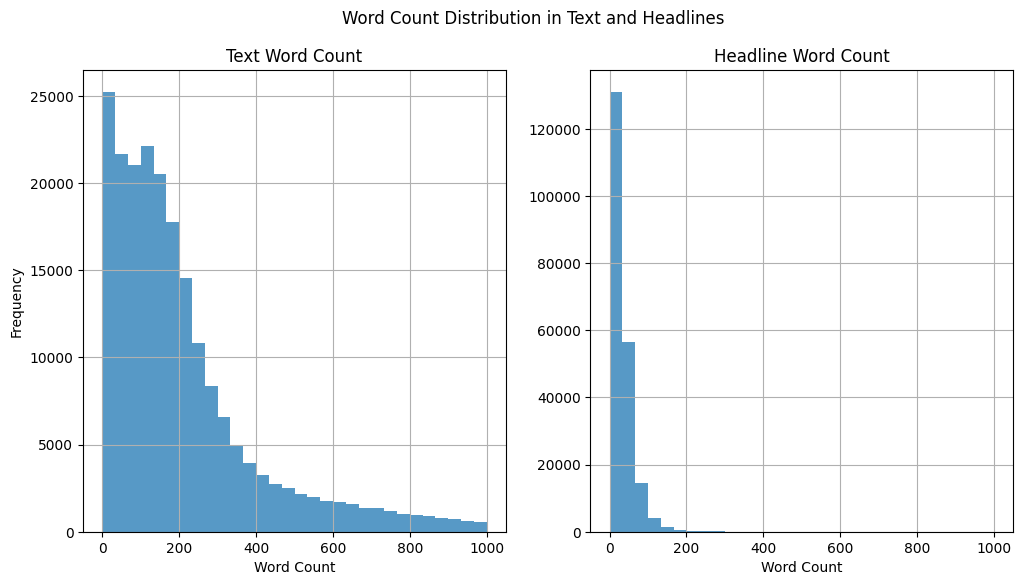

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your DataFrame 'df' and list calculations are correct
text_word_count = [len(i.split()) for i in df['text']]
headline_word_count = [len(j.split()) for j in df['headline']]
length_df = pd.DataFrame({'text': text_word_count, 'headline': headline_word_count})

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
length_df['text'].hist(bins=30, range=[0, 1000], alpha=0.75, ax=axes[0])
length_df['headline'].hist(bins=30, range=[0, 1000], alpha=0.75, ax=axes[1])

axes[0].set_title('Text Word Count')
axes[1].set_title('Headline Word Count')
axes[0].set_xlabel('Word Count')
axes[0].set_ylabel('Frequency')
axes[1].set_xlabel('Word Count')

plt.suptitle('Word Count Distribution in Text and Headlines')
plt.show()


In [35]:
# From the graph
# We can fix maximum length of text = 150 since most of the reviews have a length of 150 and maximum headline length of 50, since maximum headlines are of size 40

max_len_text= 150
max_len_headline=50

In [36]:
cnt=0
for i in df['text']:
    if(len(i.split())<=1500):
        cnt=cnt+1
print(cnt/len(df['text']))

0.9975415139098555


Selecting text and headlines below the maximum lengths

In [37]:
text1 =np.array(df['text'])
headline1=np.array(df['headline'])

short_text=[]
short_summary=[]

for i in range(len(text1)):
    if(len(headline1[i].split())<=50 and len(text1[i].split())<=150):
        short_text.append(text1[i])
        short_summary.append(headline1[i])

df=pd.DataFrame({'text':short_text,'summary':short_summary})

In [38]:
# Validating the lengths

text1 =np.array(df['text'])
headline1=np.array(df['summary'])


for i in range(len(text1)):
    if(len(headline1[i].split())>=150):
      print(i)


In [39]:
print(df['text'][50],df['summary'][50],sep='\n')

guy like every facebook status update instagram picture post better yet frequently comment posts sign wants interact may indicate likes look see comments people posts well comments frequently may reveal avid social media user however rarely likes comments posts sign might feelings publicly comments one photos posts respond eager start conversation way may reveal likes least enjoys messaging example may say great photo could respond saying vancouver last week beautiful city guy met starts liking commenting old photos sig interested means spent time looking back old photos probably wants know better enjoys looking pictures guy likes want connect follow variety different social media platforms example may add facebook snapchat start following twitter instagram adding number social media sites likely sign wants look posts photos selfies attempt get know better
see interacts posts reply comments notice comments old pictures posts check see added multiple social media platforms


**Splitting data into train, test  --  70 - 30**

In [98]:
from sklearn.model_selection import train_test_split
x_tr,x_val,y_tr,y_val=train_test_split(df['text'],df['summary'],test_size=0.3,random_state=0,shuffle=True)

In [99]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Ensure x_tr and y_tr are lists of strings
x_tr = x_tr.tolist() if isinstance(x_tr, np.ndarray) else list(x_tr)
y_tr = y_tr.tolist() if isinstance(y_tr, np.ndarray) else list(y_tr)

# Initialize tokenizers with an OOV token to handle out-of-vocabulary words
x_tokenizer = Tokenizer(oov_token='unk')
y_tokenizer = Tokenizer(oov_token='unk')

# Fit tokenizers on texts including special tokens
x_tokenizer.fit_on_texts(['sostok', 'eostok'] + x_tr)
y_tokenizer.fit_on_texts(['sostok', 'eostok'] + y_tr)

# Convert text sequences into integer sequences
x_tr_seq = x_tokenizer.texts_to_sequences(x_tr)
x_val_seq = x_tokenizer.texts_to_sequences(x_val)

# Pad sequences to a fixed length
x_tr = pad_sequences(x_tr_seq, maxlen=max_len_text, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_len_text, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = len(x_tokenizer.word_index) + 1

# Repeat for summaries
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr)
y_val_seq = y_tokenizer.texts_to_sequences(y_val)
y_tr = pad_sequences(y_tr_seq, maxlen=max_len_headline, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_len_headline, padding='post')
y_voc = len(y_tokenizer.word_index) + 1

print("Size of vocabulary in X = {}".format(x_voc))
print("Size of vocabulary in Y = {}".format(y_voc))

# Ensure special tokens are included in the vocabulary
target_word_index = y_tokenizer.word_index
if 'sostok' not in target_word_index:
    target_word_index['sostok'] = max(target_word_index.values()) + 1
if 'eostok' not in target_word_index:
    target_word_index['eostok'] = max(target_word_index.values()) + 1


Size of vocabulary in X = 60014
Size of vocabulary in Y = 35108


In [100]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in x_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 51.67966406718656
Total Coverage of rare words: 1.0464487313290465


In [103]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Assuming 'original_x_tr' and 'original_x_val' hold the original training and validation texts
original_x_tr = df['text'].values  # Original texts as a NumPy array or list
original_x_val = df['text'].values  # Same for validation

# Initialize the tokenizer
x_tokenizer = Tokenizer(num_words=tot_cnt-cnt)
x_tokenizer.fit_on_texts(list(original_x_tr))  # Use the original texts for fitting

# Convert text sequences into integer sequences
x_tr_seq = x_tokenizer.texts_to_sequences(original_x_tr)
x_val_seq = x_tokenizer.texts_to_sequences(original_x_val)

# Padding zero up to maximum length
x_tr = pad_sequences(x_tr_seq, maxlen=max_len_text, padding='post')
x_val = pad_sequences(x_val_seq, maxlen=max_len_text, padding='post')

# Size of vocabulary (+1 for padding token)
x_voc = x_tokenizer.num_words + 1

print("Size of vocabulary in X = {}".format(x_voc))


Size of vocabulary in X = 28999


In [105]:
# Assume 'df' is your original DataFrame with a 'summary' column containing the raw text summaries
original_y_tr = df['summary'].values  # Ensure this is run before any encoding

# Now prepare the tokenizer for the summaries
y_tokenizer = Tokenizer()
y_tokenizer.fit_on_texts(list(original_y_tr))  # Fit using the original text data


In [106]:
thresh=6

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in y_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value

print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 63.39814032121724
Total Coverage of rare words: 2.6460966977275127


In [108]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assuming 'df' has a 'summary' column with raw text summaries
x, y = df['text'], df['summary']
x_tr, x_val, y_tr, y_val = train_test_split(x, y, test_size=0.3, random_state=0, shuffle=True)

# Tokenizer setup
y_tokenizer = Tokenizer(num_words=tot_cnt - cnt)
y_tokenizer.fit_on_texts(list(y_tr))  # Ensure y_tr is a list of raw text summaries

# Convert text sequences into integer sequences
y_tr_seq = y_tokenizer.texts_to_sequences(y_tr)
y_val_seq = y_tokenizer.texts_to_sequences(y_val)

# Padding zero up to maximum length
y_tr = pad_sequences(y_tr_seq, maxlen=max_len_headline, padding='post')
y_val = pad_sequences(y_val_seq, maxlen=max_len_headline, padding='post')

# Size of vocabulary (+1 for padding token not accounted for in num_words)
y_voc = y_tokenizer.num_words + 1

print("Size of vocabulary in Y = {}".format(y_voc))


Size of vocabulary in Y = 14723


In [109]:
ind=[]
for i in range(len(y_tr)):
    cnt=0
    for j in y_tr[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_tr=np.delete(y_tr,ind, axis=0)
x_tr=np.delete(x_tr,ind, axis=0)

In [110]:
ind=[]
for i in range(len(y_val)):
    cnt=0
    for j in y_val[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

y_val=np.delete(y_val,ind, axis=0)
x_val=np.delete(x_val,ind, axis=0)

In [111]:
from keras import backend as K
import gensim
from numpy import *
import numpy as np
import pandas as pd
import re
from bs4 import BeautifulSoup
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from nltk.corpus import stopwords
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
import warnings
pd.set_option("display.max_colwidth", 200)
warnings.filterwarnings("ignore")

print("Size of vocabulary from the w2v model = {}".format(x_voc))

K.clear_session()

latent_dim = 300
embedding_dim=200

# Encoder
encoder_inputs = Input(shape=(max_len_text,))

#embedding layer
enc_emb =  Embedding(x_voc, embedding_dim,trainable=True)(encoder_inputs)

#encoder lstm 1
encoder_lstm1 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

#encoder lstm 2
encoder_lstm2 = LSTM(latent_dim,return_sequences=True,return_state=True,dropout=0.4,recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

#encoder lstm 3
encoder_lstm3=LSTM(latent_dim, return_state=True, return_sequences=True,dropout=0.4,recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))

#embedding layer
dec_emb_layer = Embedding(y_voc, embedding_dim,trainable=True)
dec_emb = dec_emb_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True,dropout=0.4,recurrent_dropout=0.2)
decoder_outputs,decoder_fwd_state, decoder_back_state = decoder_lstm(dec_emb,initial_state=[state_h, state_c])

#dense layer
decoder_dense =  TimeDistributed(Dense(y_voc, activation='softmax'))
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

model.summary()


Size of vocabulary from the w2v model = 28999
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150)]                0         []                            
                                                                                                  
 embedding (Embedding)       (None, 150, 200)             5799800   ['input_1[0][0]']             
                                                                                                  
 lstm (LSTM)                 [(None, 150, 300),           601200    ['embedding[0][0]']           
                              (None, 300),                                                        
                              (None, 300)]                                                        
                                                

In [112]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')


In [113]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,patience=2)


In [ ]:
# Configuring the model for training
training_history = model.fit(
    [x_train, y_train[:, :-1]],
    y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:, 1:],
    epochs=50,
    batch_size=128,
    callbacks=[early_stopping],
    validation_data=(
        [x_validate, y_validate[:, :-1]],
        y_validate.reshape(y_validate.shape[0], y_validate.shape[1], 1)[:, 1:]
    )
)

In [78]:
reverse_target_word_index=y_tokenizer.index_word
reverse_source_word_index=x_tokenizer.index_word
target_word_index=y_tokenizer.word_index

In [79]:
# Setting up the encoder model to process the input sequence and retrieve the corresponding states
model_encoder = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# Initializing the input layers for the decoder's states
input_decoder_state_h = Input(shape=(latent_dim,))
input_decoder_state_c = Input(shape=(latent_dim,))
input_decoder_hidden_state = Input(shape=(max_len_text, latent_dim))

# Embedding the decoder inputs
embedded_decoder = dec_emb_layer(decoder_inputs)

# Generating the next word in sequence using initial states from the encoder
output_decoder, new_state_h, new_state_c = decoder_lstm(embedded_decoder, initial_state=[input_decoder_state_h, input_decoder_state_c])

# Applying a dense softmax layer to create a probability distribution over the target vocabulary
output_decoder = decoder_dense(output_decoder)

# Constructing the complete decoder model with outputs and updated states
model_decoder = Model(
    [decoder_inputs, input_decoder_hidden_state, input_decoder_state_h, input_decoder_state_c],
    [output_decoder, new_state_h, new_state_c]
)


In [87]:
def translate_sequence(input_seq):
    # Fetch initial states from encoder output
    initial_states = encoder_model.predict(input_seq)

    # Initialize the sequence with the start token
    start_sequence = np.zeros((1, 1))
    if 'sostok' in target_word_index:
        start_sequence[0, 0] = target_word_index['sostok']
    else:
        print("Error: Start token 'sostok' not in vocabulary index.")
        return ""

    translation = ''
    end_of_sequence = False
    while not end_of_sequence:
        # Predict the next word's token and update states
        predicted_tokens, state_h, state_c = decoder_model.predict([start_sequence] + initial_states)

        # Choose the token with highest probability
        next_token_index = np.argmax(predicted_tokens[0, -1, :])
        next_word = reverse_target_word_index.get(next_token_index, '')

        # Check if the translation should end
        if next_word == '' or len(translation) > max_decoder_seq_length:
            end_of_sequence = True
        else:
            translation += ' ' + next_word

            # Prepare the next token for the LSTM input
            start_sequence = np.zeros((1, 1))
            start_sequence[0, 0] = next_token_index

            # Update LSTM states
            initial_states = [state_h, state_c]

    return translation.strip()


In [88]:
# Check if 'sostok' is not in the dictionary and add it
if 'sostok' not in target_word_index:
    target_word_index['sostok'] = len(target_word_index) + 1  # Assign a new unique index

# Do the same for 'eostok' if necessary
if 'eostok' not in target_word_index:
    target_word_index['eostok'] = len(target_word_index) + 1  # Assign a new unique index


In [89]:
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0 and i not in [target_word_index.get('sostok', None), target_word_index.get('eostok', None)]:
            newString += reverse_target_word_index.get(i, '') + ' '
    return newString.strip()

def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if i != 0:
            newString += reverse_source_word_index.get(i, '') + ' '
    return newString.strip()


In [ ]:
import pandas as pd

# Initialize a list to hold dictionaries for each set of data
data = []

# Process each sequence
for i in range(0, 100):
    review = seq2text(x_tr[i])
    original_summary = seq2summary(y_tr[i])
    predicted_summary = decode_sequence(x_tr[i].reshape(1, max_len_text))

    # Append each set of results to the data list as a dictionary
    data.append({
        "Review": review,
        "Original Summary": original_summary,
        "Predicted Summary": predicted_summary
    })

# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(data)

# Specify the file path for the CSV
file_path = '/content/drive/MyDrive/CS521_Project/Attention_LSTM_Pred.csv'

# Write the DataFrame to a CSV file
df.to_csv(file_path, index=False)
